In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import scipy.interpolate as interp
import pandas as pd
from sklearn.metrics import mean_squared_error 

from helpers import *
# ensure the notebook generate the same randomess
np.random.seed(1)

### Sprawdzenie opcji umiarkowanej

In [2]:
n = 100
r = 10000

In [3]:
PoA_mean = []
PoA_min = []

for N in range(2,n): 
    v = np.random.uniform(0,1,(N,r))
    b_mean = bet_moderate(N, v)
    b_variance = produce_variance(b_mean, v)
    b =  negative_to_zero(bet_normal(b_mean,b_variance), 1)
    winner=np.argmax(b, axis=0)
    Welf = v[winner, np.arange(r)]
    Opt =v.max(axis = 0)
    PoA = Welf/Opt
    PoA_mean.append(np.mean(PoA))
    PoA_min.append(min(PoA))

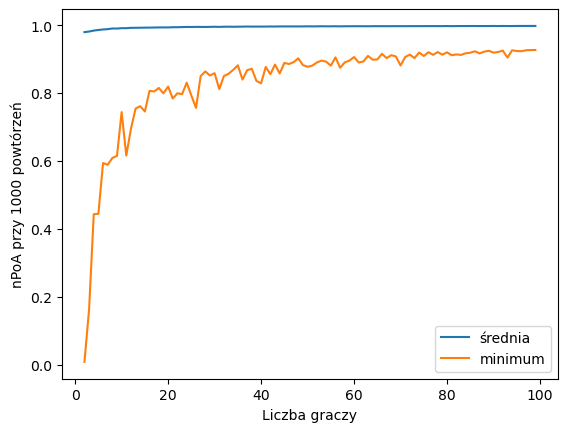

In [4]:
fig, ax = plt.subplots()
x = list(range(2,n))
ax.plot(x,PoA_mean, label = 'średnia')
ax.plot(x,PoA_min, label = 'minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy 1000 powtórzeń")
ax.legend(loc='lower right')
#plt.ylim(0, 1.05)
plt.savefig('moderate_second_price.png')

### Sprawdzenie Beta'' z overbettingiem

In [5]:
PoA_mean = []
PoA_min = []

for N in range(2,n): 
    v = np.random.uniform(0,1,(N,r))
    b_mean = bet_Bayes_Nash_all_better(N, v)
    b_variance = produce_variance(b_mean, 1)
    b =  negative_to_zero(bet_normal(b_mean,b_variance), 1)
    winner=np.argmax(b, axis=0)
    Welf = v[winner, np.arange(r)]
    Opt =v.max(axis = 0)
    PoA = Welf/Opt
    PoA_mean.append(np.mean(PoA))
    PoA_min.append(min(PoA))


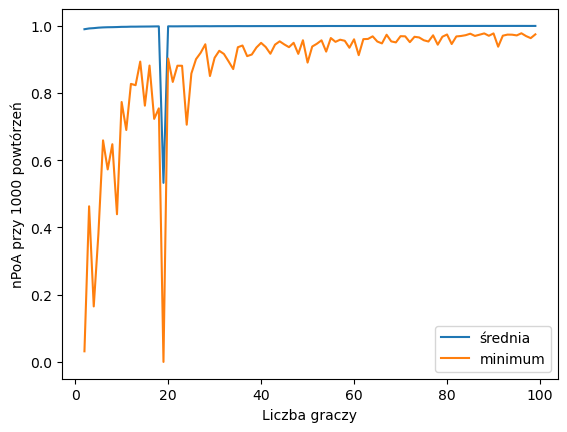

In [6]:
fig, ax = plt.subplots()
x = list(range(2,n))
ax.plot(x,PoA_mean, label = 'średnia')
ax.plot(x,PoA_min, label = 'minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy 1000 powtórzeń")
ax.legend(loc='lower right')
#plt.ylim(0, 1.05)
plt.savefig('pictures/overbetting/better_all_pay.png')

### Sprawdzenie Beta'' bez overbettingu

In [ ]:
PoA_mean = []
PoA_min = []

for N in range(2,n): 
    v = np.random.uniform(0,1,(N,r))
    b_mean = bet_Bayes_Nash_all_better(N, v)
    b_variance = produce_variance(b_mean, v)
    b =  negative_to_zero(bet_normal(b_mean,b_variance), 1)
    winner=np.argmax(b, axis=0)
    Welf = v[winner, np.arange(r)]
    Opt =v.max(axis = 0)
    PoA = Welf/Opt
    PoA_mean.append(np.mean(PoA))
    PoA_min.append(min(PoA))

In [ ]:
fig, ax = plt.subplots()
x = list(range(2,n))
ax.plot(x,PoA_mean, label = 'średnia')
ax.plot(x,PoA_min, label = 'minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy 1000 powtórzeń")
ax.legend(loc='lower right')
#plt.ylim(0, 1.05)
plt.savefig('pictures/no_overbetting/better_all_pay.png')

### Statystyki porównawcze dla ofert z U(0,1)

In [7]:
PoA_mean_uniform = []
PoA_min_uniform = []

for N in range(2,n): 
    v = np.random.uniform(0,1,(N,r))
    b = bet_random(v)
    winner=np.argmax(b, axis=0)
    Welf = v[winner, np.arange(r)]
    Opt =v.max(axis = 0)
    PoA = Welf/Opt
    PoA_mean_uniform.append(np.mean(PoA))
    PoA_min_uniform.append(min(PoA))

In [8]:
n = 100
r = 1000
xs = list(np.linspace(start=0.0, stop=1, num=100))

### Szukanie lepszego wykładnika liniowo bez overbettingu

In [9]:

MSE_best = np.inf
for x in xs:
    PoA_mean = []
    PoA_min = []
    for N in range(2,n):
        v = np.random.uniform(0,1,(N,r))
        b_mean = bet_between(N, v, x)
        b_variance = produce_variance(b_mean, v)
        b =  negative_to_zero(bet_normal(b_mean,b_variance), 1)
        winner=np.argmax(b, axis=0)
        Welf = v[winner, np.arange(r)]
        Opt =v.max(axis = 0)
        PoA = Welf/Opt
        PoA_mean.append(np.mean(PoA))
        PoA_min.append(min(PoA))
    MSE = mean_squared_error(PoA_min, PoA_min_uniform)
    if MSE < MSE_best:
        MSE_best = MSE
        x_best = x

0.0
0.010101010101010102
0.020202020202020204
0.030303030303030304
0.04040404040404041
0.05050505050505051
0.06060606060606061
0.07070707070707072
0.08080808080808081
0.09090909090909091
0.10101010101010102
0.11111111111111112
0.12121212121212122
0.13131313131313133
0.14141414141414144
0.15151515151515152
0.16161616161616163
0.17171717171717174
0.18181818181818182
0.19191919191919193
0.20202020202020204
0.21212121212121213
0.22222222222222224
0.23232323232323235
0.24242424242424243
0.25252525252525254
0.26262626262626265
0.27272727272727276
0.2828282828282829
0.29292929292929293
0.30303030303030304
0.31313131313131315
0.32323232323232326
0.33333333333333337
0.3434343434343435
0.3535353535353536
0.36363636363636365
0.37373737373737376
0.38383838383838387
0.393939393939394
0.4040404040404041
0.4141414141414142
0.42424242424242425
0.43434343434343436
0.4444444444444445
0.4545454545454546
0.4646464646464647
0.4747474747474748
0.48484848484848486
0.494949494949495
0.5050505050505051
0.51515

In [10]:
print(x_best)

0.32323232323232326


In [11]:
print(MSE_best)

0.12069948956895551


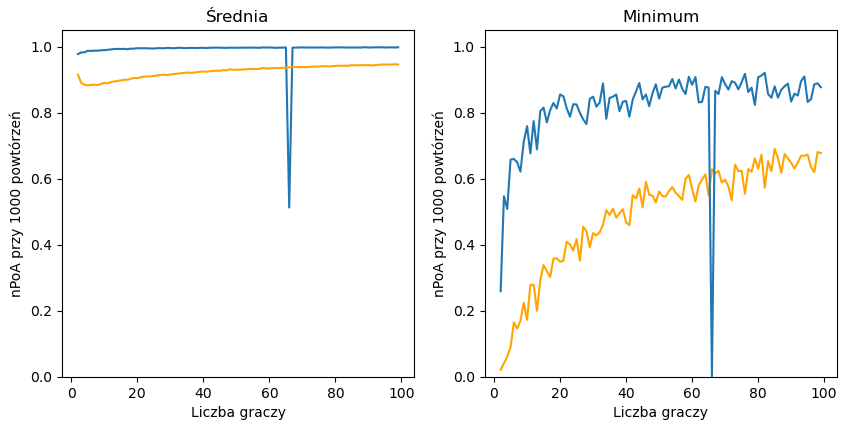

In [14]:
fig, ax = plt.subplots(1,2, figsize=(10, 4.5))
x = list(range(2,n))

ax[0].plot(x,PoA_mean, label = 'średnia rozkład jednostajny', color = 'C0')
ax[0].plot(x,PoA_mean_uniform, label = 'średnia rozkład jednostajny', color = 'orange')
ax[0].set_ylim(0, 1.05)
ax[0].set_title('Średnia')
ax[0].set_xlabel("Liczba graczy")
ax[0].set_ylabel("nPoA przy 1000 powtórzeń")


ax[1].plot(x,PoA_min_uniform, color = 'orange')
ax[1].plot(x,PoA_min, color = 'C0')
ax[1].set_title('Minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy 1000 powtórzeń")
plt.ylim(0, 1.05)

plt.savefig('pictures/no_overbetting/universal_comparison_exp.png')

### Szukanie lepszego wykładnika liniowo z overbettingiem

In [ ]:

MSE_best = np.inf
for x in xs:
    PoA_mean = []
    PoA_min = []
    for N in range(2,n):
        v = np.random.uniform(0,1,(N,r))
        b_mean = bet_between(N, v, x)
        b_variance = produce_variance(b_mean, 1)
        b =  negative_to_zero(bet_normal(b_mean,b_variance), 1)
        winner=np.argmax(b, axis=0)
        Welf = v[winner, np.arange(r)]
        Opt =v.max(axis = 0)
        PoA = Welf/Opt
        PoA_mean.append(np.mean(PoA))
        PoA_min.append(min(PoA))
    MSE = mean_squared_error(PoA_min, PoA_min_uniform)
    if MSE < MSE_best:
        MSE_best = MSE
        x_best = x

In [ ]:
print(x_best)

In [ ]:
print(MSE_best)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10, 4.5))
x = list(range(2,n))

ax[0].plot(x,PoA_mean, label = 'średnia rozkład jednostajny', color = 'C0')
ax[0].plot(x,PoA_mean_uniform, label = 'średnia rozkład jednostajny', color = 'orange')
ax[0].set_ylim(0, 1.05)
ax[0].set_title('Średnia')
ax[0].set_xlabel("Liczba graczy")
ax[0].set_ylabel("nPoA przy 1000 powtórzeń")


ax[1].plot(x,PoA_min_uniform, color = 'orange')
ax[1].plot(x,PoA_min, color = 'C0')
ax[1].set_title('Minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy 1000 powtórzeń")
plt.ylim(0, 1.05)

plt.savefig('pictures/no_overbetting/universal_comparison_exp.png')

In [ ]:
### Szukanie lepszego wykładnika z logarytmem bez overbettingu

In [15]:
xs = list(np.linspace(start=1.1, stop=2, num=101))
print(xs)

[1.5, 1.505, 1.51, 1.515, 1.52, 1.525, 1.53, 1.535, 1.54, 1.545, 1.55, 1.555, 1.56, 1.565, 1.57, 1.575, 1.58, 1.585, 1.59, 1.595, 1.6, 1.605, 1.61, 1.615, 1.62, 1.625, 1.63, 1.635, 1.6400000000000001, 1.645, 1.65, 1.655, 1.66, 1.665, 1.67, 1.675, 1.68, 1.685, 1.69, 1.695, 1.7, 1.705, 1.71, 1.715, 1.72, 1.725, 1.73, 1.735, 1.74, 1.745, 1.75, 1.755, 1.76, 1.7650000000000001, 1.77, 1.775, 1.78, 1.7850000000000001, 1.79, 1.795, 1.8, 1.805, 1.81, 1.815, 1.82, 1.825, 1.83, 1.835, 1.84, 1.845, 1.85, 1.855, 1.8599999999999999, 1.865, 1.87, 1.875, 1.88, 1.885, 1.8900000000000001, 1.895, 1.9, 1.905, 1.9100000000000001, 1.915, 1.92, 1.925, 1.93, 1.935, 1.94, 1.945, 1.95, 1.955, 1.96, 1.965, 1.97, 1.975, 1.98, 1.9849999999999999, 1.99, 1.995, 2.0]


In [16]:
MSE_best_log = np.inf

for x in xs:

    PoA_mean = []
    PoA_min = []
    for N in range(2,n):
        v = np.random.uniform(0,1,(N,r))
        b_mean = bet_Bayes_Nash_all_log(N, v, x)
        b_variance = produce_variance(b_mean, v)
        b =  negative_to_zero(bet_normal(b_mean,b_variance), 1)
        
        winner=np.argmax(b, axis=0)
        Welf = v[winner, np.arange(r)]
        Opt =v.max(axis = 0)
        PoA = Welf/Opt
        PoA_mean.append(np.mean(PoA))
        PoA_min.append(min(PoA))
    MSE_log = mean_squared_error(PoA_min, PoA_min_uniform)
    if MSE_log < MSE_best_log:
        MSE_best_log = MSE_log
        x_best_log = x

In [17]:
PoA_mean = []
PoA_min = []

for N in range(2,n): 
    v = np.random.uniform(0,1,(N,r))
    b_mean = bet_Bayes_Nash_all_log(N, v, x_best_log)
    b_variance = produce_variance(b_mean, v)
    b =  negative_to_zero(bet_normal(b_mean,b_variance), 1)
    winner=np.argmax(b, axis=0)
    Welf = v[winner, np.arange(r)]
    Opt =v.max(axis = 0)
    PoA = Welf/Opt
    PoA_mean.append(np.mean(PoA))
    PoA_min.append(min(PoA))

In [18]:
print(MSE_best_log)
print(x_best_log)

0.13589097836390107
1.975


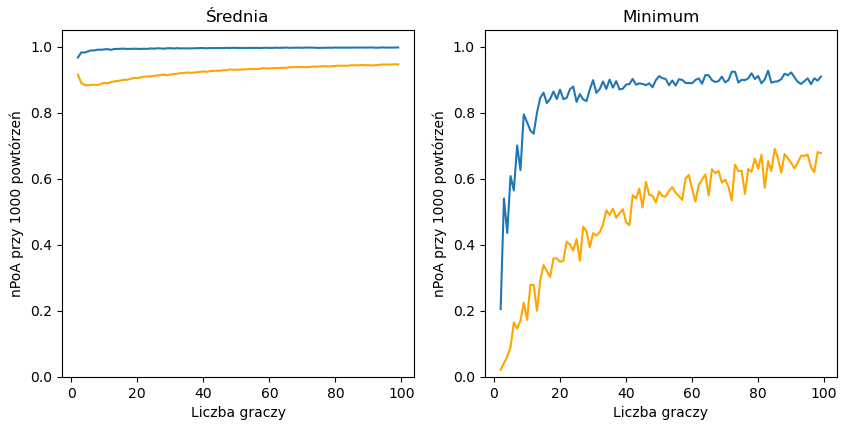

In [20]:
fig, ax = plt.subplots(1,2, figsize=(10, 4.5))
x = list(range(2,n))

ax[0].plot(x,PoA_mean, label = 'średnia rozkład jednostajny', color = 'C0')
ax[0].plot(x,PoA_mean_uniform, label = 'średnia rozkład jednostajny', color = 'orange')
ax[0].set_ylim(0, 1.05)
ax[0].set_title('Średnia')
ax[0].set_xlabel("Liczba graczy")
ax[0].set_ylabel("nPoA przy 1000 powtórzeń")


ax[1].plot(x,PoA_min_uniform, color = 'orange')
ax[1].plot(x,PoA_min, color = 'C0')
ax[1].set_title('Minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy 1000 powtórzeń")
plt.ylim(0, 1.05)

plt.savefig('pictures/no_overbetting/universal_comparison_log.png')

### Szukanie lepszego wykładnika z logarytmem z overbettingiem

In [ ]:
MSE_best_log = np.inf

for x in xs:

    PoA_mean = []
    PoA_min = []
    for N in range(2,n):
        v = np.random.uniform(0,1,(N,r))
        b_mean = bet_Bayes_Nash_all_log(N, v, x)
        b_variance = produce_variance(b_mean, v)
        b =  negative_to_zero(bet_normal(b_mean,b_variance), 1)
        
        winner=np.argmax(b, axis=0)
        Welf = v[winner, np.arange(r)]
        Opt =v.max(axis = 0)
        PoA = Welf/Opt
        PoA_mean.append(np.mean(PoA))
        PoA_min.append(min(PoA))
    MSE_log = mean_squared_error(PoA_min, PoA_min_uniform)
    if MSE_log < MSE_best_log:
        MSE_best_log = MSE_log
        x_best_log = x

In [ ]:
PoA_mean = []
PoA_min = []

for N in range(2,n): 
    v = np.random.uniform(0,1,(N,r))
    b_mean = bet_Bayes_Nash_all_log(N, v, x_best_log)
    b_variance = produce_variance(b_mean, 1)
    b =  negative_to_zero(bet_normal(b_mean,b_variance), 1)
    winner=np.argmax(b, axis=0)
    Welf = v[winner, np.arange(r)]
    Opt =v.max(axis = 0)
    PoA = Welf/Opt
    PoA_mean.append(np.mean(PoA))
    PoA_min.append(min(PoA))

In [ ]:
print(MSE_best_log)
print(x_best_log)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10, 4.5))
x = list(range(2,n))

ax[0].plot(x,PoA_mean, label = 'średnia rozkład jednostajny', color = 'C0')
ax[0].plot(x,PoA_mean_uniform, label = 'średnia rozkład jednostajny', color = 'orange')
ax[0].set_ylim(0, 1.05)
ax[0].set_title('Średnia')
ax[0].set_xlabel("Liczba graczy")
ax[0].set_ylabel("nPoA przy 1000 powtórzeń")


ax[1].plot(x,PoA_min_uniform, color = 'orange')
ax[1].plot(x,PoA_min, color = 'C0')
ax[1].set_title('Minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy 1000 powtórzeń")
plt.ylim(0, 1.05)

plt.savefig('pictures/overbetting/universal_comparison_log.png')